In [7]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 1.0
%config InlineBackend.figure_formats = ['svg']

# The SNO model

The transmon circuit is modelled as a $d$-dimensional standard nonlinear oscillator,
\begin{align}
    H_0 = \sum_{j=1}^{d-1} (j\omega_{01}+\Delta_j)|j\rangle\langle j|,
\end{align}
where $\omega_{01}/2\pi$ is the resonant frequency of the first transition. $\Delta_j$ is the generalized anharmonicity. We set $\Delta_1=0$, then
\begin{align}
    \Delta_j = \Delta_2(j-1)j/2,
\end{align}
where $\Delta_2=\alpha<0$ is the usual anharmonicity. Experimentally, $\alpha\approx -300$ MHz.

### The drive

We model the drive as a dipole interaction. Let the dipole of the oscillator be
\begin{align}
    d = d_0(b+b^\dagger).
\end{align}
where $b^\dagger, b$ are the creation, annihilation operators. The dipole constant $d_0$ is a function of several fundamental parameters. The external field is, generally,
\begin{align}
    \mathcal{E}(t) = \mathcal{E}_x(t)\cos(\omega_d t + \theta_d)+\mathcal{E}_y(t)\sin(\omega_d t + \theta_d),
\end{align}
where the field's amplitude are enveloped by two functions $\mathcal{E}_x(t)$ and $\mathcal{E}_y(t)$.

The interaction between them is
\begin{align}
    H_{\text{int}} &= - d\cdot \mathcal{E}(t),\\
    &= (b+b^\dagger) \cdot \mathcal{E}(t),
\end{align}
where the dipole constant is absorbed into the field's amplitude.

Since the $b,b^\dagger$ operators representing an infinite-dimensional Hilbert space, let us truncate them to $d$ level. Denoting $\sigma^x_{jk}=|j\rangle\langle k|+|k\rangle\langle j|$, then
\begin{align}
    H_{\text{int}} &= (b+b^\dagger) \cdot \mathcal{E}(t),\\
    &=\mathcal{E}(t)\sum_{j=1}^{d-1}\sqrt{\lambda_{j-1}}\sigma^x_{j-1,j}
\end{align}
where $\sigma^x_{j-1,j}$ are typically referred to as the Pauli spin operator between the levels $j-1, j$. The parameter $\lambda_j$ weights the strength of the transition between the states $|j-1\rangle$ and $|j\rangle$ versus $|0\rangle$ and $|1\rangle$ (the first two eigenstates). For a typical harmonic oscillator, $\lambda_{j-1}=\sqrt{j}$. For our case, it is instructive to normalize $\lambda_{0}=1$ and take other $\lambda_{j-1}, j>1$ as input parameters.

Before we continue, note the following identity of the drive 
\begin{align}
\mathcal{E}(t) &=\mathcal{E}_x(t)\cos(\omega_d t + \theta_d)+\mathcal{E}_y(t)\sin(\omega_d t + \theta_d),\\
 &= \dfrac{1}{2}\left[(\mathcal{E}_x(t)+i\mathcal{E}_y(t))e^{-i(\omega_d t +\theta_d)}+(\mathcal{E}_x(t)-i\mathcal{E}_y(t))e^{i(\omega_d t+\theta_d)}\right],\\
    & = \dfrac{1}{2}\left[\Omega(t)e^{-i(\omega_d t+\theta_d)}+\Omega^*(t)e^{i(\omega_d t+\theta_d)}\right]
\end{align}
where $\Omega(t) =\mathcal{E}_x(t)+i\mathcal{E}_y(t)$. Now, the interaction Hamiltonian is succinctly written as
\begin{align}
    H_{\text{int}} &=\mathcal{E}(t)\sum_{j=1}^{d-1}\lambda_{j-1}\sigma^x_{j-1,j},\\
    &= \left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{j=1}^{d-1}\lambda_{j-1}\sigma^x_{j-1,j},\\
    &=\left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{j=1}^{d-1}\lambda_{j-1}\left(|j-1\rangle\langle j|+|j\rangle\langle j-1|\right).
\end{align}

### Rotating frame

Let us now go into the frame that rotates with frequency $\omega_d$. The unitary transformation is given by
\begin{align}
    U_1(t) &= \exp\left[-i\omega_d\left(\sum_{j=1}^{d-1}j\Pi_j\right)t\right],\\
    &= \sum_{j=1}^{d-1}\exp\left[-i\omega_d j t\right]\Pi_j,\\
    U_2(t) &= \sum_{j=1}^{d-1}\exp(-i\omega_j t)\Pi_j.
\end{align}
where the projector $\Pi_{k}=|j\rangle\langle j|$. In arriving at the second line we use the fact that $|j\rangle\langle j|$ is diagonal. The derivative of this unitary with respect to time is
\begin{align}
    \dot{U}(t) &= \dfrac{d}{dt}\left(\sum_{j=1}^{d-1}\exp\left[-i\omega_d j t\right]\Pi_j\right),\\
    &=\sum_{j=1}^{d-1}\left((-i
    \omega_d j)\exp\left[-i\omega_d j t\right]\Pi_j\right)
\end{align}
The transformed Hamiltonian, denoted as $H'(t)$, reads
\begin{align}
    H'(t) = U^\dagger(t)\left(H_0+H_{\text{int}}(t)\right)U(t) + i \dot{U}^\dagger(t)U(t)
\end{align}
Note the first term, $[H_0,\Pi_j]=0$, therefore $H_0$ is invariant under this unitary transformation. For the second term,
\begin{align}
    U^\dagger(t)H_{\text{int}}(t)U(t) &= \sum_{l=1}^{d-1}\exp\left[i\omega_d l t\right]\Pi_j\left(\left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{k=1}^{d-1}\sqrt{\lambda_{k-1}}\left(|k-1\rangle\langle k|+|k\rangle\langle k-1|\right)\right)\sum_{l=1}^{d-1}\exp\left[-i\omega_d l t\right]\Pi_l,\\
    &=\left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{j=1}^{d-1}\exp\left[i\omega_d j t\right]\Pi_j \sum_{k=1}^{d-1}\sqrt{\lambda_{k-1}}\left(|k-1\rangle\langle k|+|k\rangle\langle k-1|\right) \sum_{l=1}^{d-1}\exp\left[-i\omega_d l t\right]\Pi_l,\\
    &=\left[\dfrac{\Omega(t)}{2}e^{-i(\omega_d t+\theta_d)}+\dfrac{\Omega^*(t)}{2}e^{i(\omega_d t+\theta_d)}\right]\sum_{j=1}^{d-1}\lambda_{j-1}\left(|j-1\rangle \langle j|e^{-i\omega_d t}+|j\rangle\langle j-1|e^{i\omega_d t}\right),\\
    &=\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)e^{-i\theta_d}}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)e^{i\theta_d}}{2}|j-1\rangle\langle j|\right)
\end{align}

Now the last term,
\begin{align}
    i\dot{U}^\dagger(t)U(t) = -\left(\sum_{j=1}^{d-1}j\omega_d|j\rangle\langle j|\right)
\end{align}

Now we combine everything together,
\begin{align}
    H'(t) &= U^\dagger(t)\left(H_0+H_{\text{int}}(t)\right)U(t) + i \dot{U}^\dagger(t)U(t),\\
    &=\sum_{j=1}^{d-1} (j\omega_{01}+\Delta_j)|j\rangle\langle j|+\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)e^{-i\theta_d}}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)e^{i\theta_d}}{2}|j-1\rangle\langle j|\right)-\left(\sum_{j=1}^{d-1}j\omega_d|j\rangle\langle j|\right),\\
    &=\sum_{j=1}^{d-1}\left[j(\omega_{01}-\omega_d)+\Delta_j\right]|j\rangle\langle j|+\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)e^{-i\theta_d}}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)e^{i\theta_d}}{2}|j-1\rangle\langle j|\right).
\end{align}

We note that (Thanks to Mingxuan), the relative phase between the two envelopes can be rewritten as
\begin{align}
    e^{-i\theta_d(j-j+1)}|j\rangle\langle j-1|=e^{-i j\theta_d}|j\rangle\langle j-1| e^{i(j-1)\theta_d},\\
    e^{i\theta_d(j-j+1)}|j-1\rangle\langle j| = e^{-i(j-1)\theta_d}|j-1\rangle\langle j|e^{ij\theta_d},
\end{align}
so that it is absorbed to the energy states $|j\rangle$ and becomes irrelevant. 

Finally,
\begin{align}
    H'(t) = \sum_{j=1}^{d-1}\left[j(\omega_{01}-\omega_d)+\Delta_j\right]|j\rangle\langle j|+\sum_{j=1}^{d-1}\lambda_{j-1}\left(\dfrac{\Omega(t)}{2}|j\rangle\langle j-1|+\dfrac{\Omega^*(t)}{2}|j-1\rangle\langle j|\right)
\end{align}

Now all that's left is to determine an optimal pulse shape for the in-phase and quadrature components of the pulse envelope. To reduce leakage (real transitions) to the third level, initially people used Gaussian modulation of the envelope. In this case, the envelope takes the form
\begin{align}
    \Omega_G(t) = A\dfrac{\exp\left[-\frac{(t-t_g/2)^2}{2\sigma^2}\right]-\exp\left[-\frac{t_g^2}{8\sigma^2}\right]}{1-t_g\exp\left[-\frac{t_g^2}{8\sigma^2}\right]}
\end{align}

In [8]:
from scipy import special

In [9]:
def gaussian_pulse(t, center, width, amplitude=1.0):
    """
    Generate a Gaussian pulse.
    
    Parameters:
    t (numpy array): Time array.
    center (float): Center of the Gaussian pulse.
    width (float): Standard deviation (spread or width) of the Gaussian pulse.
    amplitude (float): Amplitude of the Gaussian pulse.
    
    Returns:
    numpy array: Gaussian pulse values.
    """
    tg = center*2

    return (amplitude/1) * np.exp(-((t - tg/2)**2) / (2 * width**2))

In [10]:
def my_gaussian(t, args):
    """
    Generate a truncated Gaussian pulse
    """
    sigma = args['sigma']
    center = args['center']
    amplitude = args['amplitude']
    tg = center*2 
    numerator = np.exp(-(t-tg/2)**2/(2*sigma**2)) - np.exp(-tg**2/(8*sigma**2))
    denominator = np.sqrt(2*np.pi*sigma**2)*special.erf(tg/(np.sqrt(8)*sigma))-tg*np.exp(-tg**2/(8*sigma**2))

    return (amplitude*numerator)/denominator

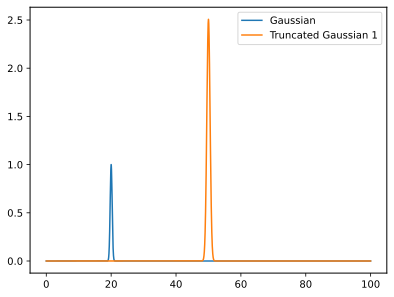

In [6]:
sampling_rate = 0.01
tmax = 100
tseries = np.arange(0, tmax, sampling_rate)
args = {'sigma': 0.5, 'center': 50, 'amplitude': np.pi}
g1 = [my_gaussian(t, args) for t in tseries]
# g3 = [my_gaussian(t,args) for t in tseries]

# train = np.sum([g1, g3], axis=0) 

plt.plot(tseries, [gaussian_pulse(t, 20, 0.3) for t in tseries], label='Gaussian')
plt.plot(tseries, g1, label='Truncated Gaussian 1')
# plt.plot(tseries, g2, label='Truncated Gaussian 2')
# plt.plot(tseries, g3, label='Truncated Gaussian 3')
# plt.plot(tseries, g4, label='Truncated Gaussian 4')
# plt.plot(tseries, train)

plt.legend()

/Users/ngdnhtien/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


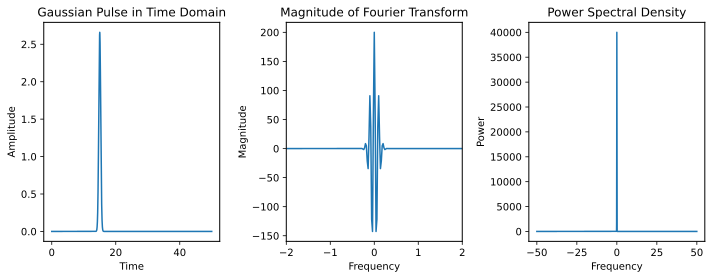

In [10]:
G1 = np.fft.fft(g3)
frequencies = np.fft.fftfreq(len(tseries), sampling_rate)

# Shift zero frequency component to the center
G1_shifted = np.fft.fftshift(G1)
frequencies_shifted = np.fft.fftshift(frequencies)

# Compute the Power Spectral Density (PSD)
PSD = np.abs(G1_shifted) ** 2

# Plot the Gaussian pulse in time domain
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.plot(tseries, g1)
plt.title('Gaussian Pulse in Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the magnitude of the Fourier Transform in frequency domain
plt.subplot(1, 3, 2)
plt.plot(frequencies_shifted, G1_shifted)
plt.xlim([-2, 2])
plt.title('Magnitude of Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Plot the Power Spectral Density (PSD)
plt.subplot(1, 3, 3)
plt.plot(frequencies_shifted, PSD)
plt.title('Power Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Power')

plt.tight_layout()
plt.show()

## Driven transmon

In [11]:
d = 5 # dimension of the SNO
omega_01 = 4.8151 # GHz
omega_d = 4.8151 # GHz
Delta_2 = -0.3097 # GHz
delta = omega_01 - omega_d # GHz

In [70]:
H_static = 0

for j in range(1, d):
    Delta_j = Delta_2*(j-1)*j/2 # GHz
    freq = j*delta + Delta_j # GHz
    ket_j = qt.basis(d, j)
    bra_j = ket_j.dag()
    H_static += freq * ket_j * bra_j

In [72]:
sigma_jk = 0

for j in range(1, d):
    lambda_j = np.sqrt(j)
    operator = qt.basis(d, j) * qt.basis(d, j-1).dag()
    sigma_jk += lambda_j * operator

sigma_kj = sigma_jk.dag()

In [73]:
H = [H_static, [sigma_jk, my_gaussian], [sigma_kj, my_gaussian]]

ket0 = qt.basis(d, 0)
ket1 = qt.basis(d, 1)
ket2 = qt.basis(d, 2)

In [92]:
tmax = 150
step = 0.01
times = np.arange(0, tmax, step)
args = {'sigma': 50/4, 'center': 60}
psi0 = qt.basis(d, 0)
H = [H_static, [sigma_jk, my_gaussian], [sigma_kj, my_gaussian]]
output = qt.mesolve(H, psi0, times, [], [], args)

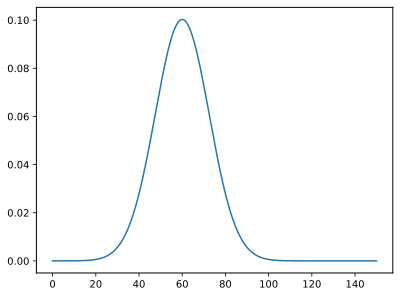

In [93]:
plt.plot(times, [my_gaussian(t, args) for t in times], label='My Gaussian')

In [94]:
pop0 = []
pop1 = []
pop2 = []

for state in output.states:
    pop0.append(np.abs((ket0.dag() * state).full()[0][0])**2)
    pop1.append(np.abs((ket1.dag() * state).full()[0][0])**2)
    pop2.append(np.abs((ket2.dag() * state).full()[0][0])**2)

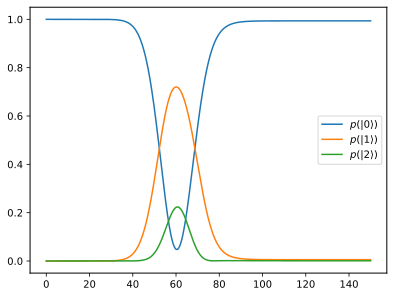

In [95]:
plt.plot(times, pop0, label=r'$p(|0\rangle)$')
plt.plot(times, pop1, label=r'$p(|1\rangle)$')
plt.plot(times, pop2, label=r'$p(|2\rangle)$')
plt.legend()